In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
link = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"

In [5]:
df = pd.read_csv(link)

In [6]:
df.drop('id', axis = 1, inplace = True)
df.drop('Unnamed: 0', axis = 1, inplace = True)
#Xóa cột

In [7]:
mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, mean, inplace = True)
#Thay missing value bằng mean

In [8]:
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean, inplace = True)
#Thay missing value bằng mean

In [9]:
df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'price']].corr()
#Kiểm tra mức liên hệ giữa các features và giá: bathrooms, sqft_living, sqft_above

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
bedrooms,1.000000,0.514194,0.578077,0.032307,0.178022,-0.006800,0.026690,0.479286,0.302856,0.155749,0.018456,0.308797
bathrooms,0.514194,1.000000,0.755371,0.087929,0.502132,0.063744,-0.126197,0.686309,0.283428,0.506913,0.050560,0.525738
sqft_living,0.578077,0.755371,1.000000,0.172826,0.353949,0.103818,-0.058753,0.876597,0.435043,0.318049,0.055363,0.702035
sqft_lot,0.032307,0.087929,0.172826,1.000000,-0.005201,0.021604,-0.008958,0.183512,0.015286,0.053080,0.007644,0.089661
floors,0.178022,0.502132,0.353949,-0.005201,1.000000,0.023698,-0.263768,0.523885,-0.245705,0.489319,0.006338,0.256794
waterfront,-0.006800,0.063744,0.103818,0.021604,0.023698,1.000000,0.016653,0.072075,0.080588,-0.026161,0.092885,0.266369
condition,0.026690,-0.126197,-0.058753,-0.008958,-0.263768,0.016653,1.000000,-0.158214,0.174105,-0.361417,-0.060618,0.036362
sqft_above,0.479286,0.686309,0.876597,0.183512,0.523885,0.072075,-0.158214,1.000000,-0.051943,0.423898,0.023285,0.605567
sqft_basement,0.302856,0.283428,0.435043,0.015286,-0.245705,0.080588,0.174105,-0.051943,1.000000,-0.133124,0.071323,0.323816
yr_built,0.155749,0.506913,0.318049,0.053080,0.489319,-0.026161,-0.361417,0.423898,-0.133124,1.000000,-0.224874,0.054012


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(df[['bathrooms']], df[['price']])
Rsquare_bathrooms = lr.score(df[['bathrooms']], df[['price']])
Yhat_bathrooms = lr.predict(df[['bathrooms']])
MSE_bathrooms = mean_squared_error(df[['price']], Yhat_bathrooms)
#Kiểm tra hệ số R^2, MSE và giá trị dự đoán khi sử dụng mô hình hồi quy đơn
print("R^2 is: ", Rsquare_bathrooms)
print("Yhat is: ", Yhat_bathrooms)
print("MSE is: ", MSE_bathrooms)

R^2 is:  0.27639993060314383
Yhat is:  [[259981.40373925]
 [573795.19760539]
 [259981.40373925]
 ...
 [197218.64496602]
 [636557.95637862]
 [197218.64496602]]
MSE is:  97524025867.46486


In [11]:
lr.fit(df[['sqft_living']], df[['price']])
Rsquare_sqft_living = lr.score(df[['sqft_living']], df[['price']])
Yhat_sqft_living = lr.predict(df[['sqft_living']])
MSE_sqft_living = mean_squared_error(df[['price']], Yhat_sqft_living)
#Kiểm tra hệ số R^2, MSE và giá trị dự đoán khi sử dụng mô hình hồi quy đơn
print("R^2 is: ", Rsquare_sqft_living)
print("Yhat is: ", Yhat_sqft_living)
print("MSE is: ", MSE_sqft_living)

R^2 is:  0.4928532179037931
Yhat is:  [[287555.06702451]
 [677621.82640197]
 [172499.40418656]
 ...
 [242655.29616092]
 [405416.96554144]
 [242655.29616092]]
MSE is:  68351286833.039825


In [12]:
lr.fit(df[['sqft_above']], df[['price']])
Rsquare_sqft_above = lr.score(df[['sqft_above']], df[['price']])
Yhat_sqft_above = lr.predict(df[['sqft_above']])
MSE_sqft_above = mean_squared_error(df[['price']], Yhat_sqft_above)
#Kiểm tra hệ số R^2, MSE và giá trị dự đoán khi sử dụng mô hình hồi quy đơn
print("R^2 is: ", Rsquare_sqft_above)
print("Yhat is: ", Yhat_sqft_above)
print("MSE is: ", MSE_sqft_above)

R^2 is:  0.36671175283827917
Yhat is:  [[376751.55360603]
 [642540.0094903 ]
 [266677.54662366]
 ...
 [333795.84356413]
 [489510.29246602]
 [333795.84356413]]
MSE is:  85352146869.25163


<ipython-input-13-21c6ebae17eb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df[['price']], hist = False, color = 'r', label = 'Actual Value')
<ipython-input-13-21c6ebae17eb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat_bathrooms, hist = False, color = 'b', l

<Axes: ylabel='Density'>

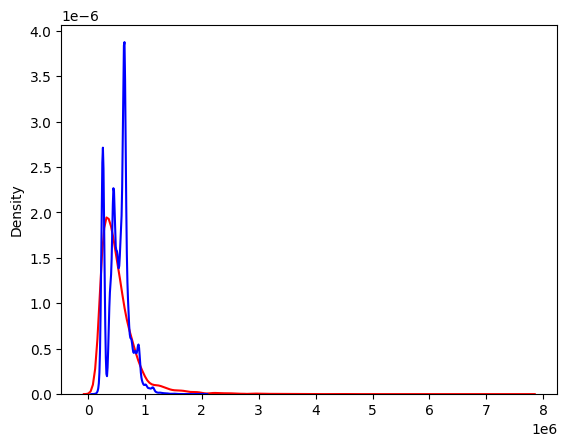

In [13]:
ax1 = sns.distplot(df[['price']], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(Yhat_bathrooms, hist = False, color = 'b', label = 'Fitted Value', ax = ax1)
#Vẽ biểu đồ phân bố

<ipython-input-14-c793763d21e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(df[['price']], hist = False, color = 'r', label = 'Actual Value')
<ipython-input-14-c793763d21e4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat_sqft_living, hist = False, color = 'b',

<Axes: ylabel='Density'>

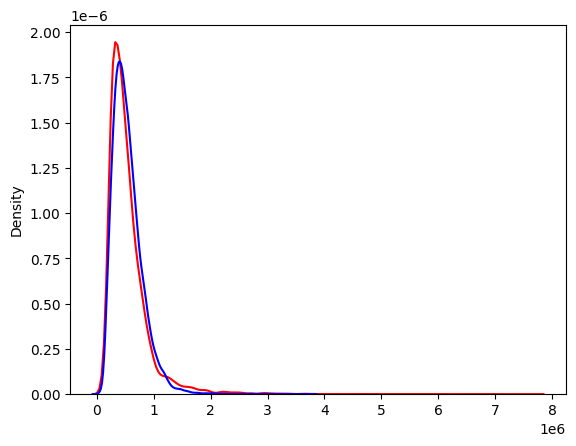

In [14]:
ax2 = sns.distplot(df[['price']], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(Yhat_sqft_living, hist = False, color = 'b', label = 'Fitted Value', ax = ax2)
#Vẽ biểu đồ phân bố

<ipython-input-15-47eaee730c55>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax3 = sns.distplot(df[['price']], hist = False, color = 'r', label = 'Actual Value')
<ipython-input-15-47eaee730c55>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat_sqft_above, hist = False, color = 'b', 

<Axes: ylabel='Density'>

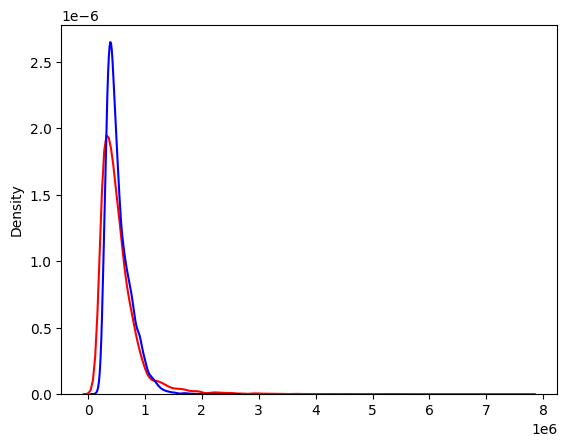

In [15]:
ax3 = sns.distplot(df[['price']], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(Yhat_sqft_above, hist = False, color = 'b', label = 'Fitted Value', ax = ax3)
#Vẽ biểu đồ phân bố

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
order = [2,3,4,5,6,7,8,9,10]
Rsquare = []
for n in order:
  Input = [('scale', StandardScaler()), ('features', PolynomialFeatures(n)), ('regression', LinearRegression())]
  pipe = Pipeline(Input)
  score = cross_val_score(pipe, df[['bathrooms']], df[['price']], cv = 3)
  Rsquare.append(score)
Rsquare
#Tìm bậc đa thức phù hợp bằng R^2

[array([0.33674044, 0.33723062, 0.32782227]),
 array([0.3368221 , 0.33473611, 0.32776317]),
 array([0.33701564, 0.20038925, 0.32592861]),
 array([0.33476042, 0.21770601, 0.33187942]),
 array([ 0.33382611, -0.86166504,  0.33188921]),
 array([ 0.33303186, -7.33591054,  0.32479358]),
 array([  0.33386839, -14.18256748,   0.31755193]),
 array([ 0.33241216, -7.84655361,  0.316935  ]),
 array([  0.33548772, -24.49558826,   0.30783822])]

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
Input = [('scale', StandardScaler()), ('features', PolynomialFeatures(2)), ('regression', LinearRegression())]
pipe = Pipeline(Input)
predict = cross_val_predict(pipe, df[['bathrooms']], df[['price']], cv = 3)
predict
#Tính biến dự đoán

array([[354861.13247486],
       [517584.48814378],
       [354861.13247486],
       ...,
       [361084.44520541],
       [590691.59800766],
       [361084.44520541]])

In [19]:
from sklearn.metrics import mean_squared_error
MSE_bathrooms = mean_squared_error(df[['price']], predict)
MSE_bathrooms
#Tính MSE

89683785664.83408

<ipython-input-20-c72a0e3ea948>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df[['price']], hist = False, color = 'r', label = 'Actual Value')
<ipython-input-20-c72a0e3ea948>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predict, hist = False, color = 'b', label = 

<Axes: ylabel='Density'>

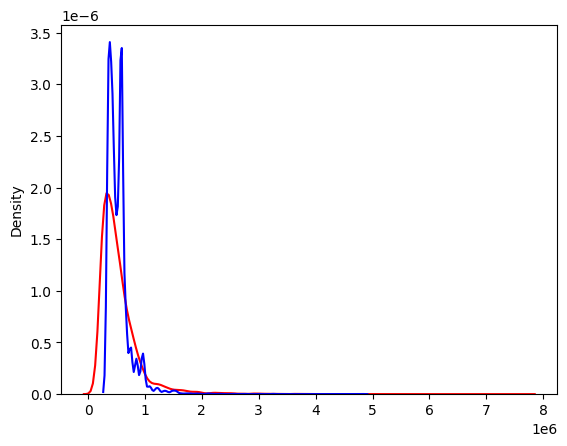

In [20]:
ax1 = sns.distplot(df[['price']], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(predict, hist = False, color = 'b', label = 'Fitted Value', ax = ax1)
#Vẽ biểu đồ phân bố của đa thức bậc 2

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
order = [2,3,4,5,6,7,8,9,10]
Rsquare = []
for n in order:
  Input = [('scale', StandardScaler()), ('features', PolynomialFeatures(n)), ('regression', LinearRegression())]
  pipe = Pipeline(Input)
  score = cross_val_score(pipe, df[['sqft_living']], df[['price']], cv = 3)
  Rsquare.append(score)
Rsquare
#Tìm bậc đa thức phù hợp bằng R^2

[array([0.54515693, 0.50398074, 0.52369462]),
 array([0.54616147, 0.49859976, 0.52551888]),
 array([0.55084778, 0.2969378 , 0.51504074]),
 array([ 0.55497267, -2.72879541,  0.51187205]),
 array([ 0.54975374, -0.2629678 ,  0.52355492]),
 array([  0.5501109 , -18.83432283,   0.52341868]),
 array([ 0.54938453, -5.71557678,  0.52424061]),
 array([ 5.49205157e-01, -1.70072149e+03,  5.23830119e-01]),
 array([ 5.49281862e-01, -7.65225283e+03,  5.23888532e-01])]

In [22]:
Input = [('scale', StandardScaler()), ('features', PolynomialFeatures(degree = 3)), ('regression', LinearRegression())]
pipe = Pipeline(Input)
predict2 = cross_val_predict(pipe, df[['sqft_living']], df[['price']], cv = 3)
predict2
#Tính biến dự đoán

array([[344657.04064495],
       [616103.23701407],
       [316352.5063575 ],
       ...,
       [332510.49849357],
       [398262.92908515],
       [332510.49849357]])

In [23]:
MSE_sqft_living = mean_squared_error(df[['price']], predict2)
MSE_sqft_living
#Tính MSE

64099384012.21407

<ipython-input-24-3ea8b8699548>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df[['price']], hist = False, color = 'r', label = 'Actual Value')
<ipython-input-24-3ea8b8699548>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predict2, hist = False, color = 'b', label =

<Axes: ylabel='Density'>

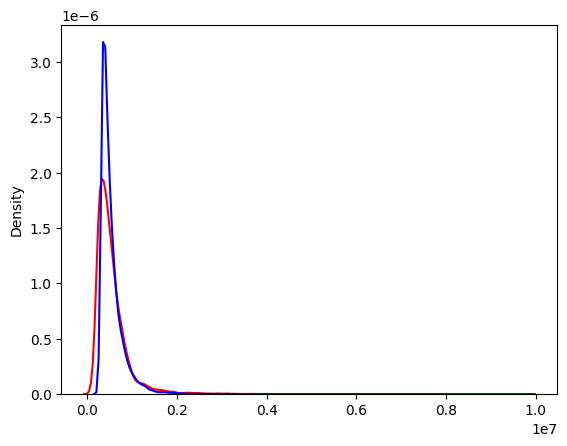

In [24]:
ax1 = sns.distplot(df[['price']], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(predict2, hist = False, color = 'b', label = 'Fitted Value', ax = ax1)
#Vẽ biểu đồ phân bố của đa thức bậc 3

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
order = [2,3,4,5,6,7,8,9,10]
Rsquare = []
for n in order:
  Input = [('scale', StandardScaler()), ('features', PolynomialFeatures(n)), ('regression', LinearRegression())]
  pipe = Pipeline(Input)
  score = cross_val_score(pipe, df[['sqft_above']], df[['price']], cv = 3)
  Rsquare.append(score)
Rsquare
#Tìm bậc đa thức phù hợp bằng R^2

[array([0.41039456, 0.39517245, 0.38840796]),
 array([0.41071092, 0.3918671 , 0.3870468 ]),
 array([0.41441533, 0.39204282, 0.38804904]),
 array([0.41180321, 0.39428397, 0.37694467]),
 array([0.41140014, 0.34292149, 0.36793731]),
 array([0.40180753, 0.08986093, 0.3753219 ]),
 array([ 0.39480022, -3.01914395,  0.38063692]),
 array([0.39454484, 0.19124028, 0.38218413]),
 array([  0.39687512, -51.05471704,   0.3843126 ])]

In [26]:
Input = [('scale', StandardScaler()), ('features', PolynomialFeatures(4)), ('regression', LinearRegression())]
pipe = Pipeline(Input)
predict3 = cross_val_predict(pipe, df[['sqft_above']], df[['price']], cv = 3)
predict3
#Tính biến dự đoán

array([[402334.56962002],
       [590762.64761891],
       [328703.79071956],
       ...,
       [368918.01388925],
       [484685.42327837],
       [368918.01388925]])

In [27]:
MSE_sqft_above = mean_squared_error(df[['price']], predict3)
MSE_sqft_above
#Tính MSE

80995989224.9909

<ipython-input-28-7246f05fbe77>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df[['price']], hist = False, color = 'r', label = 'Actual Value')
<ipython-input-28-7246f05fbe77>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predict3, hist = False, color = 'b', label =

<Axes: ylabel='Density'>

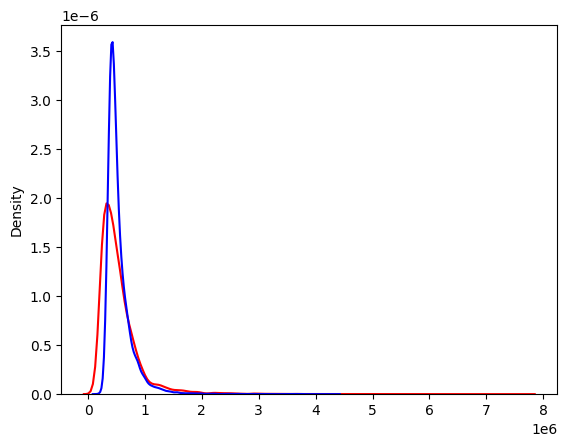

In [28]:
ax1 = sns.distplot(df[['price']], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(predict3, hist = False, color = 'b', label = 'Fitted Value', ax = ax1)
#Vẽ biểu đồ phân bố của đa thức bậc 4

In [29]:
from sklearn.linear_model import Ridge
Rsquare = []
alpha = [0.1, 1, 10]
for n in alpha:
  Input = [('scale', StandardScaler()), ('features', PolynomialFeatures(degree = 3)), ('ridge', Ridge(alpha = n))]
  pipe = Pipeline(Input)
  score = cross_val_score(pipe, df[['sqft_living']], df[['price']], cv = 3)
  Rsquare.append(score)
Rsquare
#Tìm hệ số alpha phù hợp cho mô hình hồi quy đa thức bậc 3

[array([0.54616152, 0.49859766, 0.52551897]),
 array([0.54616202, 0.49857874, 0.52551983]),
 array([0.54616688, 0.49838926, 0.52552825])]

In [30]:
Yhat = []
Input = [('scale', StandardScaler()), ('features', PolynomialFeatures(degree = 3)), ('ridge', Ridge(alpha = 10))]
pipe = Pipeline(Input)
predict = cross_val_predict(pipe, df[['sqft_living']], df[['price']], cv = 3)
Yhat.append(predict)
Yhat
#Tính biến dự đoán

[array([[344847.22342885],
        [615976.64338901],
        [316669.59623229],
        ...,
        [332738.36020025],
        [398330.27245305],
        [332738.36020025]])]

<ipython-input-32-744f0c832301>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df[['price']], hist = False, color = 'r', label = 'Actual Value')
<ipython-input-32-744f0c832301>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat, hist = False, color = 'b', label = 'Fi

<Axes: ylabel='Density'>

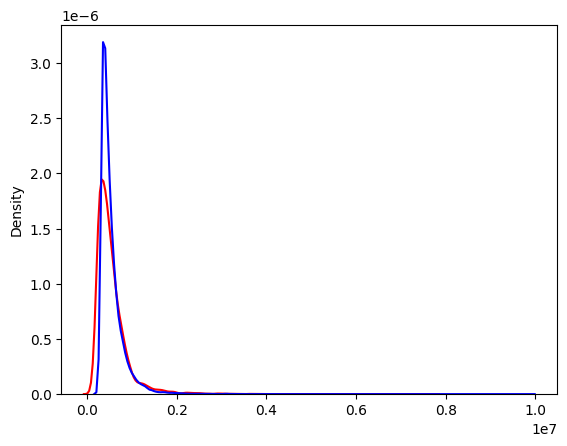

In [32]:
ax1 = sns.distplot(df[['price']], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(Yhat, hist = False, color = 'b', label = 'Fitted Value', ax = ax1)
#Vẽ biểu đồ phân bố của đa thức bậc 3